In [13]:
import numpy as np
import pandas as pd

In [14]:
file_path='data/6270000_대구광역시_07_24_04_P_일반음식점.xlsx'
df = pd.read_excel(file_path)

In [15]:
titles = df.columns
titles

Index(['번호', '개방서비스명', '개방서비스ID', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)',
       '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총종업원수',
       '본사종업원수', '공장사무직종업원수', '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액',
       '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지'],
      dtype='object')

In [16]:
drop_list = ['번호', '개방서비스명', '개방서비스ID', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '도로명전체주소', '도로명우편번호',
    '최종수정시점', '데이터갱신구분', '데이터갱신일자', '좌표정보(X)', '좌표정보(Y)',
       '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총종업원수',
       '본사종업원수', '공장사무직종업원수', '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액',
       '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지']
df = df.drop(drop_list, axis=1)

In [17]:
df.head()

,상세영업상태명,소재지전체주소,사업장명,업태구분명
0,폐업,대구광역시 중구 계산동2가 0171번지,옛날집,한식
1,폐업,대구광역시 중구 동성로3가 0016-0010번지 외7필지,명계안동찜닭,한식
2,폐업,대구광역시 중구 삼덕동1가 0022-0012번지,달구벌찜한식,한식
3,폐업,대구광역시 중구 동인동1가 0089-0002번지,맥향식당,한식
4,폐업,대구광역시 중구 문화동 0007-0007번지,차하늘,한식


In [18]:
df2 = pd.read_excel(file_path)

In [20]:
res = df2[['상세영업상태명','소재지전체주소', '사업장명', '업태구분명']]

In [23]:
df.info() # null이 아닌값과 전체값 차이로 null값이 있다는걸 알수있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79207 entries, 0 to 79206
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   상세영업상태명  79207 non-null  object
 1   소재지전체주소  79181 non-null  object
 2   사업장명     79207 non-null  object
 3   업태구분명    79204 non-null  object
dtypes: object(4)
memory usage: 2.4+ MB


In [22]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79207 entries, 0 to 79206
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   상세영업상태명  79207 non-null  object
 1   소재지전체주소  79181 non-null  object
 2   사업장명     79207 non-null  object
 3   업태구분명    79204 non-null  object
dtypes: object(4)
memory usage: 2.4+ MB


In [26]:
df=df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79178 entries, 0 to 79206
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   상세영업상태명  79178 non-null  object
 1   소재지전체주소  79178 non-null  object
 2   사업장명     79178 non-null  object
 3   업태구분명    79178 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


## 앞 공백 제거

In [27]:
df['소재지전체주소'] = df['소재지전체주소'].str.lstrip()

In [28]:
df = df[df['상세영업상태명']=='영업']
df.head()

,상세영업상태명,소재지전체주소,사업장명,업태구분명
4579,영업,대구광역시 중구 삼덕동3가 0277-0006번지,에이글라스,경양식
4580,영업,대구광역시 중구 삼덕동3가 0177-0001번지,담,일식
4581,영업,대구광역시 중구 동인동3가 0271-0001번지,울릉식당,한식
4582,영업,대구광역시 중구 동산동 0802번지,대영식당,한식
4583,영업,대구광역시 중구 공평동 0093번지,뉴스쿨(NEW SCHOOL),정종/대포집/소주방


In [30]:
df[['시도', '구', '동', '나머지']]=df['소재지전체주소'].str.split(' ', n=3, expand=True)
df.head()

,상세영업상태명,소재지전체주소,사업장명,업태구분명,시도,구,동,나머지
4579,영업,대구광역시 중구 삼덕동3가 0277-0006번지,에이글라스,경양식,대구광역시,중구,삼덕동3가,0277-0006번지
4580,영업,대구광역시 중구 삼덕동3가 0177-0001번지,담,일식,대구광역시,중구,삼덕동3가,0177-0001번지
4581,영업,대구광역시 중구 동인동3가 0271-0001번지,울릉식당,한식,대구광역시,중구,동인동3가,0271-0001번지
4582,영업,대구광역시 중구 동산동 0802번지,대영식당,한식,대구광역시,중구,동산동,0802번지
4583,영업,대구광역시 중구 공평동 0093번지,뉴스쿨(NEW SCHOOL),정종/대포집/소주방,대구광역시,중구,공평동,0093번지


In [31]:
drop_list2 = ['소재지전체주소', '시도', '나머지']
df = df.drop(drop_list2, axis=1)
df.head()

,상세영업상태명,사업장명,업태구분명,구,동
4579,영업,에이글라스,경양식,중구,삼덕동3가
4580,영업,담,일식,중구,삼덕동3가
4581,영업,울릉식당,한식,중구,동인동3가
4582,영업,대영식당,한식,중구,동산동
4583,영업,뉴스쿨(NEW SCHOOL),정종/대포집/소주방,중구,공평동


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30509 entries, 4579 to 79206
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   상세영업상태명  30509 non-null  object
 1   사업장명     30509 non-null  object
 2   업태구분명    30509 non-null  object
 3   구        30509 non-null  object
 4   동        30509 non-null  object
dtypes: object(5)
memory usage: 2.6+ MB


In [33]:
df = df[df['업태구분명'].isin(['호프/통닭','통닭(치킨)'])]
df.head()

,상세영업상태명,사업장명,업태구분명,구,동
4589,영업,반월당닭강정,호프/통닭,중구,공평동
4604,영업,상상치킨 남산점,호프/통닭,중구,남산동
4627,영업,또야,호프/통닭,중구,남산동
4684,영업,구루카페(GuruCafe),호프/통닭,중구,삼덕동1가
4699,영업,반월당닭강정 염매시장점,호프/통닭,중구,남성로


In [37]:
all_names = pd.Series(df.업태구분명.unique())
chicken_like = all_names[all_names.str.contains('통닭')]
chicken_like

0     호프/통닭
1    통닭(치킨)
dtype: object

In [38]:
df = df[df['업태구분명'].isin(chicken_like)]
df.head()

,상세영업상태명,사업장명,업태구분명,구,동
4589,영업,반월당닭강정,호프/통닭,중구,공평동
4604,영업,상상치킨 남산점,호프/통닭,중구,남산동
4627,영업,또야,호프/통닭,중구,남산동
4684,영업,구루카페(GuruCafe),호프/통닭,중구,삼덕동1가
4699,영업,반월당닭강정 염매시장점,호프/통닭,중구,남성로


In [45]:
df['count']=1
df.head()

,상세영업상태명,사업장명,업태구분명,구,동,count
4589,영업,반월당닭강정,호프/통닭,중구,공평동,1
4604,영업,상상치킨 남산점,호프/통닭,중구,남산동,1
4627,영업,또야,호프/통닭,중구,남산동,1
4684,영업,구루카페(GuruCafe),호프/통닭,중구,삼덕동1가,1
4699,영업,반월당닭강정 염매시장점,호프/통닭,중구,남성로,1


In [46]:
df.dtypes

상세영업상태명    object
사업장명       object
업태구분명      object
구          object
동          object
count       int64
dtype: object

In [48]:
chicken = df.groupby('동').sum()
chicken.head()

,count
동,
가창면,1
각산동,8
감삼동,48
검단동,5
검사동,5


In [50]:
chicken = chicken.sort_values(by='count', ascending=False)
chicken

,count
동,
대명동,149
다사읍,118
상인동,111
태전동,92
평리동,91
...,...
서내동,1
삼덕동3가,1
화전동,1


In [51]:
ids, cols = np.where(chicken == chicken.values.max())
chicken.iloc[ids]

,count
동,
대명동,149


In [52]:
top10 = chicken.sort_values(by='count' ,ascending=False)[:10]
top10

,count
동,
대명동,149
다사읍,118
상인동,111
태전동,92
평리동,91
신암동,88
비산동,82
산격동,81
송현동,76


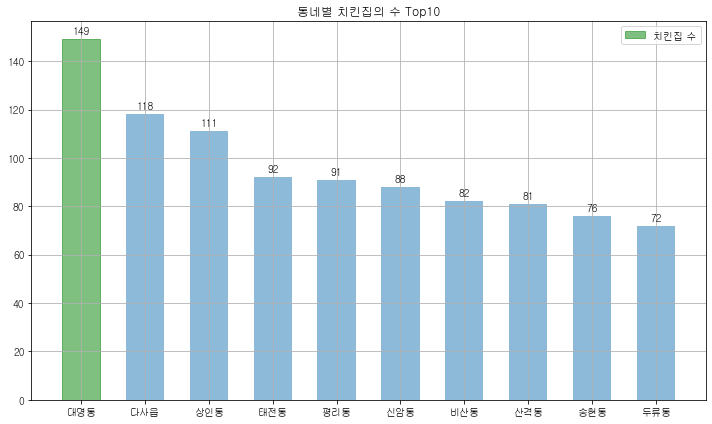

In [54]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/NGULIM.TTF'
font_family = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_family
# 위코드는 한글지원 폰트 설정

top10_values = list(np.ravel(top10.values))
x = np.arange(len(top10_values))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6)) #fig, ax = plt.subplots(TOTAL_X,TOTAL_Y,figsize=(8, 5))
plt.grid(b=True, which='both', axis='both')
rects1 = ax.bar(top10.index, top10_values, width, align='center', alpha=0.5, label='치킨집 수')
rects1[top10_values.index(max(top10_values))].set_color('g')

ax.set_title('동네별 치킨집의 수 Top10')
ax.set_xticks(x)
ax.set_xticklabels(top10.index)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
fig.tight_layout()

plt.show()

In [55]:
chicken_gu = df.groupby('구').sum()
chicken_gu

,count
구,
남구,207
달서구,841
달성군,394
동구,422
북구,618
서구,249
수성구,453
중구,183


In [56]:
print(chicken_gu.values)
print(chicken_gu.index)

[[207]
 [841]
 [394]
 [422]
 [618]
 [249]
 [453]
 [183]]
Index(['남구', '달서구', '달성군', '동구', '북구', '서구', '수성구', '중구'], dtype='object', name='구')


In [57]:
num_chickens = list(np.ravel(chicken_gu.values)) # 리스트를 옆으로 펼침
num_chickens

[207, 841, 394, 422, 618, 249, 453, 183]

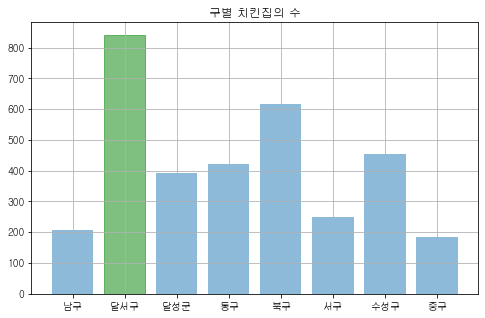

In [58]:
g, ax = plt.subplots(figsize=(8, 5))
plt.grid(b=True, which='both', axis='both')
bar_list = plt.bar(chicken_gu.index, num_chickens, align='center', alpha=0.5)
bar_list[num_chickens.index(max(num_chickens))].set_color('g')
# plt.plot([0., 7], [chicken3.loc['동구'], chicken3.loc['동구']], "m--")
plt.title('구별 치킨집의 수')

plt.show()

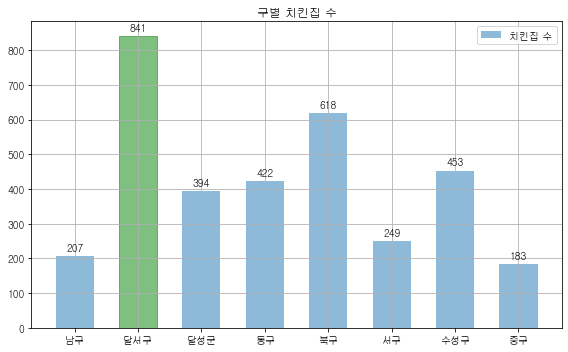

In [59]:
labels =np.ravel(chicken_gu.values)
x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5)) #fig, ax = plt.subplots(TOTAL_X,TOTAL_Y,figsize=(8, 5))

plt.grid(b=True, which='both', axis='both')
rects1 = ax.bar(chicken_gu.index, np.ravel(labels), width, align='center', alpha=0.5, label='치킨집 수')
rects1[num_chickens.index(max(num_chickens))].set_color('g')


ax.set_title('구별 치킨집 수')
ax.set_xticks(x)
ax.set_xticklabels(chicken_gu.index)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
fig.tight_layout()

plt.show()